In [1]:
#pip install nbformat
#pip install plotly --upgrade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [2]:
filename_nofluct = '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV72644_1.25/No_fluct/QL_bounce_TCV72644_1.25_nofluct_sparse.h5'
filename_fluct = '/home/devlamin/Documents/WKBeam_related/Cases_ran_before/TCV72644_1.25/Fluct/QL_bounce_TCV72644_1.25_fluct_sparse.h5'

matlab_file = '/home/devlamin/Documents/WKBeam_related/WKBacca_QL/WKBacca_cases/TCV72644_1.25/input/Drf_data.mat'


In [3]:

from scipy.io import loadmat

mat = loadmat(matlab_file)['Drf_data']
Drf_mat = mat['dat'][0,0]
rho_mat = mat['rhoP'][0,0][0]
Pnorm_mat = mat['PP'][0,0]
Ksi0_mat = mat['MHU'][0,0]
Ppar_mat, Pper_mat = Pnorm_mat*Ksi0_mat, Pnorm_mat*np.sqrt(1-Ksi0_mat**2)
print(Drf_mat.shape, rho_mat.shape, Pnorm_mat.shape, Ksi0_mat.shape)


(299, 142, 30) (30,) (142, 299) (142, 299)


The fluctuating and non-fluctuating data are different
psi:  False
p_norm:  True
ksi0:  True
harmonics:  True


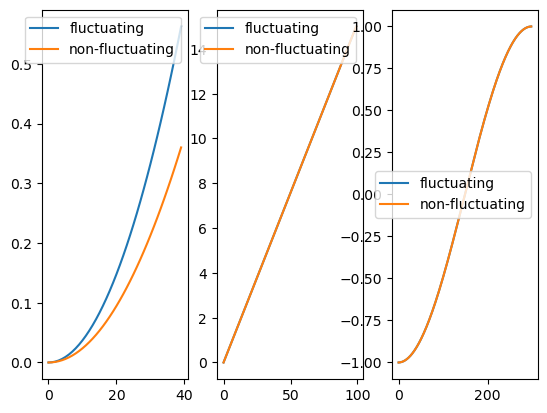

nofluct sparse:(177097,)
fluct sparse:(259930,)
Percentage filled nofluct:0.15
Percentage filled fluct:0.22
rho_max:0.6, p_max:15.0
psi:(40,), p_norm:(100,), ksi0:(299,), harmonics:(1,)


In [15]:
file_nofluct = h5py.File(filename_nofluct, 'r')
file_fluct = h5py.File(filename_fluct, 'r')
# Read the data

# Select the wanted grid
grid = 'wh'
dataname = 'DRF0_' + grid

psi = file_nofluct['psi'][()]
p_norm_w = file_nofluct['p_norm_w'][()]
p_norm_h = file_nofluct['p_norm_h'][()]
ksi0_w = file_nofluct['ksi0_w'][()]
ksi0_h = file_nofluct['ksi0_h'][()]
harmonics = file_nofluct['harmonics'][()]

Trapksi0_w = file_nofluct['Trapksi0_w'][()]
Trapksi0_h = file_nofluct['Trapksi0_h'][()]

QL_bounce_sparse = file_nofluct[dataname][()]
QL_mask = file_nofluct['mask_'+dataname][()]

file_nofluct.close()

psi_fluct = file_fluct['psi'][()]
p_norm_w_fluct = file_fluct['p_norm_w'][()]
p_norm_h_fluct = file_fluct['p_norm_h'][()]
ksi0_w_fluct = file_fluct['ksi0_w'][()]
ksi0_h_fluct = file_fluct['ksi0_h'][()]
harmonics_fluct = file_fluct['harmonics'][()]

Trapksi0_w_fluct = file_fluct['Trapksi0_w'][()]
Trapksi0_h_fluct = file_fluct['Trapksi0_h'][()]

QL_bounce_sparse_fluct = file_fluct[dataname][()]
QL_mask_fluct = file_fluct['mask_'+dataname][()]

file_fluct.close()



if grid == 'wh':
    p_norm = p_norm_w
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

    p_norm_fluct = p_norm_w_fluct
    ksi0_fluct = ksi0_h_fluct
    Trapksi0_fluct = Trapksi0_h_fluct

elif grid == 'hw':
    p_norm = p_norm_h
    ksi0 = ksi0_w
    Trapksi0 = Trapksi0_w

    p_norm_fluct = p_norm_h_fluct
    ksi0_fluct = ksi0_w_fluct
    Trapksi0_fluct = Trapksi0_w_fluct

else:
    p_norm = p_norm_h
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

    p_norm_fluct = p_norm_h_fluct
    ksi0_fluct = ksi0_h_fluct
    Trapksi0_fluct = Trapksi0_h_fluct

# Check if these are the same
if np.all(psi_fluct == psi) and np.all(p_norm_fluct == p_norm) and np.all(ksi0_fluct == ksi0) and np.all(harmonics_fluct == harmonics):
    print('The fluctuating and non-fluctuating data are the same')
else:
    print('The fluctuating and non-fluctuating data are different')
    print('psi: ', np.all(psi_fluct == psi))
    print('p_norm: ', np.all(p_norm_fluct == p_norm))
    print('ksi0: ', np.all(ksi0_fluct == ksi0))
    print('harmonics: ', np.all(harmonics_fluct == harmonics))
    plt.figure()
    ax = plt.subplot(131)
    plt.plot(psi_fluct.flatten(), label='fluctuating')
    plt.plot(psi.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(132)
    plt.plot(p_norm_fluct.flatten(), label='fluctuating')
    plt.plot(p_norm.flatten(), label='non-fluctuating')
    plt.legend()
    ax = plt.subplot(133)
    plt.plot(ksi0_fluct.flatten(), label='fluctuating')
    plt.plot(ksi0.flatten(), label='non-fluctuating')
    plt.legend()
    plt.show()
    
p_max = np.max(p_norm)
rho_max = np.max(np.sqrt(psi))
print(f'nofluct sparse:{QL_bounce_sparse.shape}')
print(f'fluct sparse:{QL_bounce_sparse_fluct.shape}')
print(f'Percentage filled nofluct:{QL_bounce_sparse.shape[0]/(psi.shape[0]*p_norm.shape[0]*ksi0.shape[0]*harmonics.shape[0]):.2f}')
print(f'Percentage filled fluct:{QL_bounce_sparse_fluct.shape[0]/(psi_fluct.shape[0]*p_norm_fluct.shape[0]*ksi0_fluct.shape[0]*harmonics_fluct.shape[0]):.2f}')
print(f'rho_max:{rho_max}, p_max:{p_max}')
print(f'psi:{psi.shape}, p_norm:{p_norm.shape}, ksi0:{ksi0.shape}, harmonics:{harmonics.shape}')


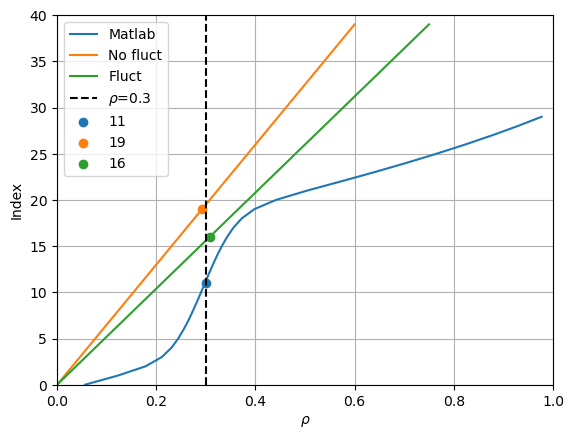

In [5]:
def closest_index(val):
    return np.argmin(np.abs(rho_mat- val)), np.argmin(np.abs(np.sqrt(psi)- val)), np.argmin(np.abs(np.sqrt(psi_fluct)- val))

rho_goal = 0.3

plt.figure()
len_mat = rho_mat.shape[0]
len_no_fluct = len(psi)
len_fluct = len(psi_fluct)

plt.plot(rho_mat, np.arange(len_mat), label='Matlab')
plt.plot(np.sqrt(psi), np.arange(len_no_fluct), label='No fluct')
plt.plot(np.sqrt(psi_fluct), np.arange(len_fluct), label='Fluct')
plt.axvline([rho_goal], color='k', linestyle='--', label=rf'$\rho$={rho_goal}')

i_mat, i_no_fluct, i_fluct = closest_index(rho_goal)

plt.scatter([rho_goal], [i_mat], label=f'{i_mat}')
plt.scatter([np.sqrt(psi[i_no_fluct])], [i_no_fluct], label=f'{i_no_fluct}')
plt.scatter([np.sqrt(psi_fluct[i_fluct])], [i_fluct], label=f'{i_fluct}')
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel('Index')
plt.xlim(0, 1)
plt.ylim(0, 40)
plt.legend()
plt.show()



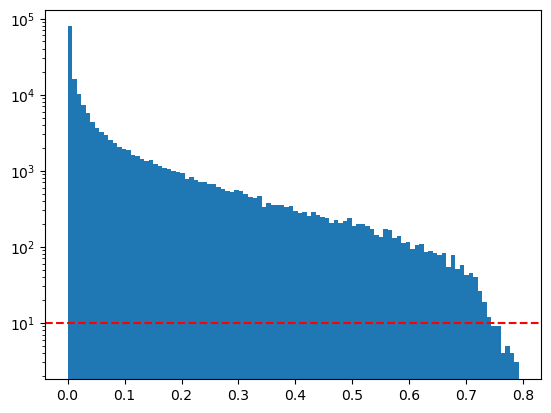

In [6]:
plt.figure()
freqbins = plt.hist(QL_bounce_sparse, bins=100, density=False, log=True)
plt.axhline(1e1, color='r', linestyle='--')
plt.show()

In [7]:
# Create the full 1D array from the sparse data
QL_bounce_flat = np.zeros(psi.shape[0]*p_norm_w.shape[0]*ksi0_h.shape[0]*harmonics.shape[0])
QL_bounce_flat[QL_mask] = QL_bounce_sparse
QL_bounce = QL_bounce_flat.reshape((psi.shape[0], p_norm_w.shape[0], ksi0_h.shape[0], harmonics.shape[0]))
QL_bounce = np.transpose(QL_bounce, (0, 2, 1, 3))
print(QL_bounce.shape)

QL_bounce_flat_fluct = np.zeros(psi_fluct.shape[0]*p_norm_w_fluct.shape[0]*ksi0_h_fluct.shape[0]*harmonics_fluct.shape[0])
QL_bounce_flat_fluct[QL_mask_fluct] = QL_bounce_sparse_fluct
QL_bounce_fluct = QL_bounce_flat_fluct.reshape((psi_fluct.shape[0], p_norm_w_fluct.shape[0], ksi0_h_fluct.shape[0], harmonics_fluct.shape[0]))
QL_bounce_fluct = np.transpose(QL_bounce_fluct, (0, 2, 1, 3))
print(QL_bounce_fluct.shape)

(40, 299, 100, 1)
(40, 299, 100, 1)


In [8]:
Pnorm, Ksi0 = np.meshgrid(p_norm_w, ksi0_h)

Ppar, Pper = Pnorm*Ksi0, Pnorm*np.sqrt(1-Ksi0**2)

PPAR = np.tile(Ppar, (len(psi), 1, 1))
PPER = np.tile(Pper, (len(psi), 1, 1))
KSI0 = np.tile(Ksi0, (len(psi), 1, 1))

RHO = np.tile(np.sqrt(psi.T), (len(p_norm_w), len(ksi0_h), 1)).T

QL_bounce = QL_bounce[:,:,:, 0]
QL_bounce_fluct = QL_bounce_fluct[:,:,:, 0]

print(QL_bounce.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO.shape)
print(KSI0.shape)

(40, 299, 100)
(40, 299, 100)
(40, 299, 100)
(40, 299, 100)
(40, 299, 100)


In [9]:
DRF_pp_nofluct = QL_bounce*(1-KSI0**2)
DRF_pp_fluct = QL_bounce_fluct*(1-KSI0**2)

In [10]:
# Interpolate the calculated data and matlab data to the same grid

from scipy.interpolate import RegularGridInterpolator
x_comp = np.linspace(min(rho_mat), 0.6, 20)
psi_comp = x_comp**2
dpsi_comp = 1/2* (np.diff(psi_comp)[:-1] + np.diff(psi_comp)[1:])
dpsi_comp = np.concatenate(([np.diff(psi_comp)[0]], dpsi_comp, [np.diff(psi_comp)[-1]]))
Drf_mat_shifted = np.transpose(Drf_mat, (2, 1, 0))
print(Drf_mat_shifted.shape)
print(QL_bounce.shape)


DRF0_nofluct_int = RegularGridInterpolator((np.sqrt(psi), ksi0, p_norm), QL_bounce, bounds_error=False, fill_value=None)
Drf_mat_int = RegularGridInterpolator((rho_mat, Ksi0_mat[:, 1], Pnorm_mat[1, :]), Drf_mat_shifted, bounds_error=False, fill_value=None)

RHO_mat= np.tile((x_comp), (len(p_norm), len(ksi0), 1)).T
PPAR_mat = np.tile(Ppar, (len(x_comp), 1, 1))
PPER_mat = np.tile(Pper, (len(x_comp), 1, 1))
DRF0_nofluct_interp = DRF0_nofluct_int((RHO_mat, Ksi0, Pnorm))
Drf_mat_interp = Drf_mat_int((RHO_mat, Ksi0, Pnorm))
print(DRF0_nofluct_interp.shape)
print(Drf_mat_interp.shape)



(30, 142, 299)
(40, 299, 100)
(20, 299, 100)
(20, 299, 100)


<Figure size 640x480 with 0 Axes>

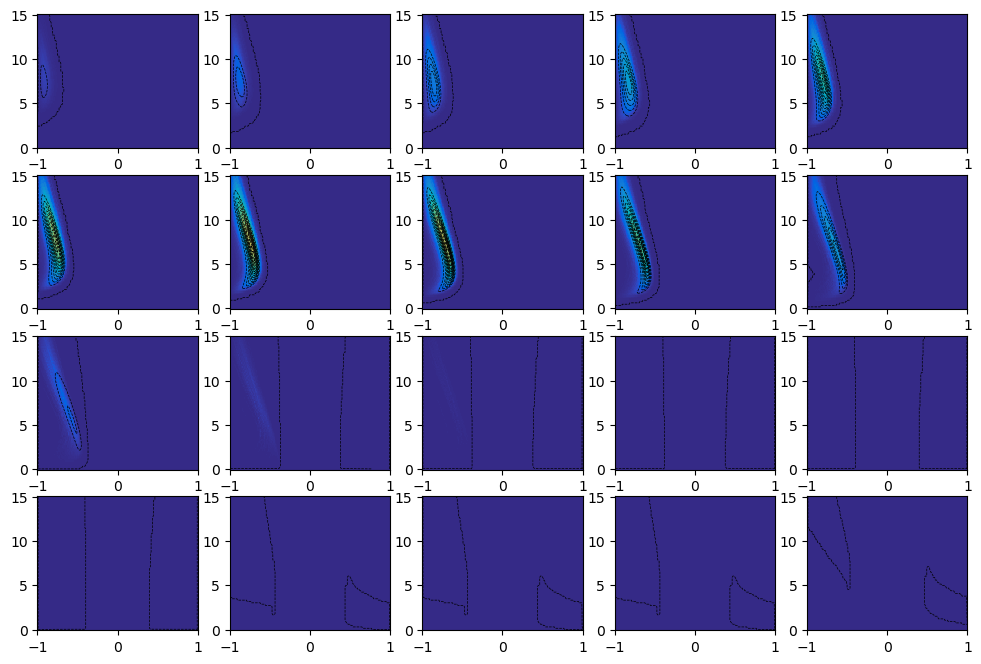

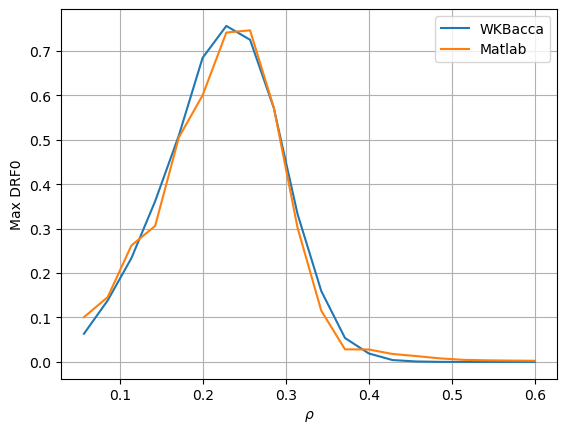

In [11]:
plt.figure()
plt.figure(figsize=(12, 8))
for i in range(len(x_comp)):
    ax = plt.subplot(4, 5, i+1)
    ax.pcolormesh(ksi0, p_norm,DRF0_nofluct_interp[i,:, :].T, cmap=parula_map, vmin=0, vmax=1)
    ax.contour(ksi0, p_norm, Drf_mat_interp[i,:, :].T, np.linspace(0, 1, 20), colors='k', linestyles='dashed', linewidths=0.5)

plt.show()

plt.figure()
plt.plot(x_comp, np.amax(DRF0_nofluct_interp[:, :, :], axis=(1, 2)), label='WKBacca')
plt.plot(x_comp, np.amax(Drf_mat_interp[:, :, :], axis=(1, 2)), label='Matlab')
plt.xlabel(r'$\rho$')
plt.ylabel('Max DRF0')
plt.legend()
plt.grid()
plt.show()



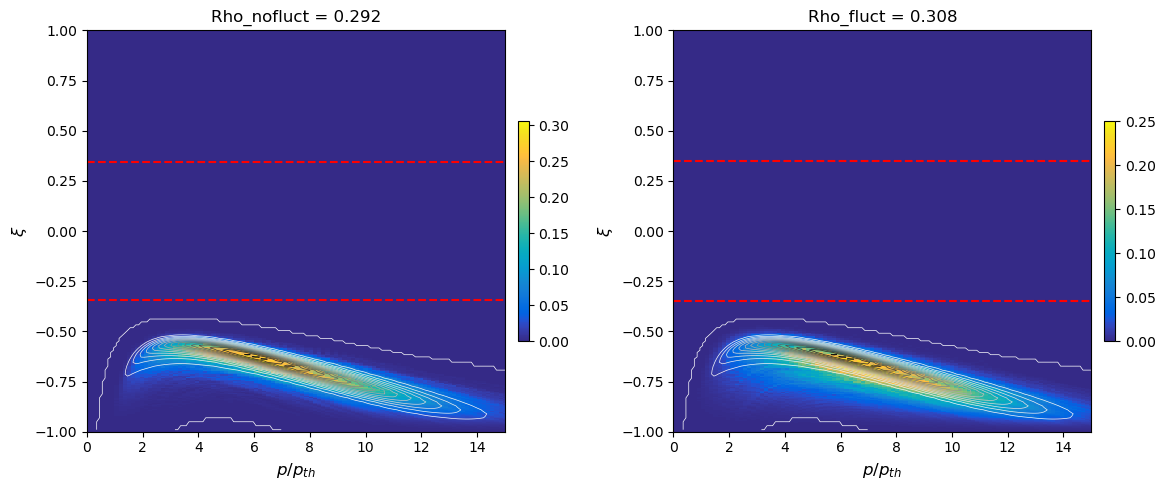

Max discrepancy: 0.6711565976790479


In [12]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)

fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_nofluct[i_no_fluct], cmap=parula_map)
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0[i_no_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0[i_no_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3}')

ax = plt.subplot(122)
fig = ax.pcolormesh(Pnorm, Ksi0, DRF_pp_fluct[i_fluct], cmap=parula_map)
fig2 = ax.contour(Pnorm_mat, Ksi0_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.5)

colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

ax.axhline(Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.axhline(-Trapksi0_fluct[i_fluct], color='r', linestyle='--')
ax.set_xlabel(r'$p/p_{th}$', size=12)
ax.set_ylabel(r'$\xi$', size=12)
ax.set_ylim(-1, 1)
ax.set_xlim(0, p_max)
ax.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3}')

plt.tight_layout()
plt.show()

print(f'Max discrepancy: {np.max(DRF_pp_nofluct[i_no_fluct]/np.amax(Drf_mat[:,:,i_mat].T))}')

In [13]:
def Trapping_line(p_par, Trapksi0, i_psi):
    #Trapping line, giving p_perp_Trap = p_par_Trap * sqrt(1 - ksi0_T^2)/ksi0_T*sign(p_par_Trap)
    return np.sign(p_par) * p_par * np.sqrt(1 - Trapksi0[i_psi]**2)/Trapksi0[i_psi]


/tmp/ipykernel_25359/2885576635.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig = ax.pcolormesh(PPAR[i_no_fluct], PPER[i_no_fluct], DRF_pp_nofluct[i_no_fluct], cmap=parula_map)
/tmp/ipykernel_25359/2885576635.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig3 = ax.pcolormesh(PPAR[i_fluct], PPER[i_fluct], DRF_pp_fluct[i_fluct], cmap=parula_map)
/tmp/ipykernel_25359/2885576635.py:25: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this

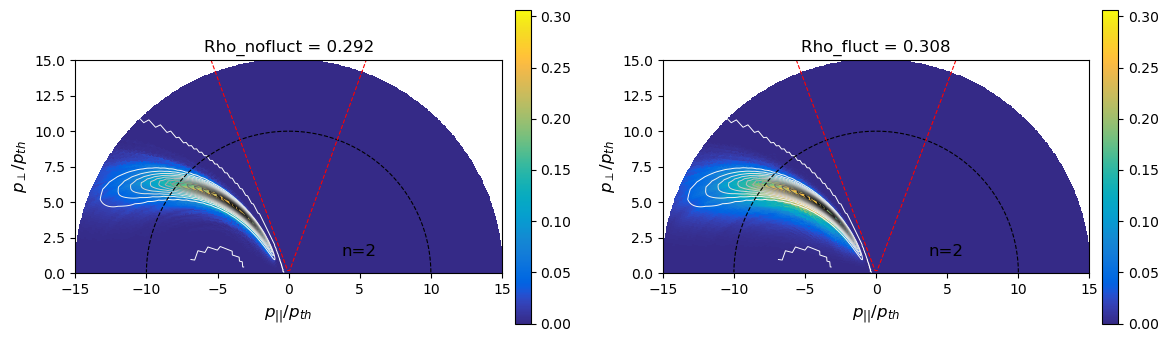

In [14]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(121)

fig = ax.pcolormesh(PPAR[i_no_fluct], PPER[i_no_fluct], DRF_pp_nofluct[i_no_fluct], cmap=parula_map)
fig2 = ax.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[i_no_fluct], PPER[i_no_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0, i_no_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
ax.set_xlim(-15, 15)
ax.set_aspect('equal')
ax.set_title(f'Rho_nofluct = {np.sqrt(psi[i_no_fluct]):.3f}')

ax = plt.subplot(122)
fig3 = ax.pcolormesh(PPAR[i_fluct], PPER[i_fluct], DRF_pp_fluct[i_fluct], cmap=parula_map)
fig4 = ax.contour(Ppar_mat, Pper_mat, Drf_mat[:,:,i_mat].T, levels=15, cmap='Greys', linewidths=0.7)
colorbar = plt.colorbar(fig, orientation='vertical', pad=.025, shrink=.55)

plt.contour(PPAR[i_fluct], PPER[i_fluct], Pnorm, levels=[10, 20, 29.99], colors='black', linestyles='dashed', linewidths=0.8)
plt.annotate(r'n=2', xy=(3, 1), xytext=(7, 2), textcoords='offset points', fontsize=12)
plt.annotate(r'n=3', xy=(13, 16), xytext=(7, 2), textcoords='offset points', fontsize=12)

p_perp_Trap = Trapping_line(np.linspace(-p_max, p_max, 200), Trapksi0_fluct, i_fluct)
plt.plot(np.linspace(-p_max, p_max, 200), p_perp_Trap, color='r', linestyle='--', linewidth=0.8)

ax.set_xlabel(r'$p_{||}/p_{th}$', size=12)
ax.set_ylabel(r'$p_{\perp}/p_{th}$', size=12)
ax.set_ylim(0, p_max)
ax.set_xlim(-15, 15)
ax.set_aspect('equal')
ax.set_title(f'Rho_fluct = {np.sqrt(psi_fluct[i_fluct]):.3f}')

plt.tight_layout()
plt.show()

